# Data exploration

## What does each column mean?
1. **name**: The player's name
2. **age**: The player's age
3. **nationality**: The player's citizenship
4. **club**: The current club of player
5. **position**: The forte position of player
6. **height**: The height of player (cm)
7. **weight**: The weight of player (kg)
8. **foot**: The foot which player prefers to use
9. **total_matches**: The total number of matches played
10. **total_goals**: The total number of goals of player
11. **total_minutes**: The total minutes on the field of player
12. **total_assists**: The total assists of player
13. **total_goals_conceded**: The total number of goals conceded
14. **total_cs**: Stands for "total clean sheets," which is the total number of matches in which the player’s team did not concede any goals
15. **total_yellow**: The total yellow cards of player
16. **total_red**: The total red cards of player
17. **minutes_per_goal_conceded**: The minutes per goal conceded
18. **shot_accuracy**: The accuracy of shot on target
19. **pass_completion_rate**: The rate of successful passes
20. **cross_completion_rate**: The rate of successful cross
21. **minute_per_assist**: The minutes taken to have an assist
22. **dribble_success_rate**: The rate of successful dribble
23. **tackles**: The number of tackles of player 
24. **interception**: The number of interceptions of player
25. **market_value**: Market value of player (milion euro)
26. **titles**: The total number of titles
27. **injuries**: The total number of injuries

## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read raw data from csv file

In [2]:
df = pd.DataFrame()
df = pd.read_csv('players.csv')

# test output
display(df.head())

# size of the data
print("Size of data: ", df.shape)

,name,age,nationality,club,position,height,weight,foot,total_matches,total_goals,...,shot_accuracy,pass_completion_rate,cross_completion_rate,minutes_per_assist,dribble_success_rate,tackles,interception,market_value,titles,injuries
0,Ardian Ismajli,28.0,Albania,Empoli,Defender - Centre Back,185.0,76.0,Right,231,5,...,0.0,83.88,NaN,NaN,0.00,9.0,21.0,5.0,0.0,3
1,Berat Djimsiti,31.0,Albania,Atalanta,Defender - Centre Back,190.0,83.0,Right,474,15,...,0.0,88.00,0.0,NaN,100.00,26.0,19.0,10.0,2.0,5
2,Elseid Hysaj,30.0,Albania,Lazio,Defender - Right Back,182.0,75.0,Right,487,6,...,NaN,86.67,NaN,NaN,0.00,1.0,0.0,2.5,1.0,2
3,Ivan Balliu,32.0,Albania,Rayo Vallecano,Defender - Right Back,172.0,63.0,Right,423,3,...,NaN,76.73,0.0,NaN,66.67,10.0,6.0,2.0,2.0,19
4,Kristjan Asllani,22.0,Albania,Inter Milan,Midfielder - Attacking Midfield,175.0,63.0,NaN,110,6,...,50.0,90.57,50.0,NaN,0.00,4.0,0.0,18.0,6.0,1


Size of data:  (1875, 27)


### Number of columns and rows

In [3]:
num_cols = len(df.columns)
num_rows = len(df.index)

print('Number of rows: ', num_rows)
print('Number of columns: ', num_cols)

Number of rows:  1875
Number of columns:  27


## Convert attributes to their appropriate data types

### Current data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1875 non-null   object 
 1   age                    1849 non-null   float64
 2   nationality            1875 non-null   object 
 3   club                   1875 non-null   object 
 4   position               1875 non-null   object 
 5   height                 1637 non-null   float64
 6   weight                 1457 non-null   float64
 7   foot                   1127 non-null   object 
 8   total_matches          1875 non-null   int64  
 9   total_goals            1875 non-null   int64  
 10  total_minutes          1875 non-null   int64  
 11  total_assists          1145 non-null   float64
 12  total_goals_conceded   730 non-null    float64
 13  total_cs               730 non-null    float64
 14  total_yellow           1875 non-null   int64  
 15  tota

### Convert attributes to more suitable data types

In [5]:
df = df.convert_dtypes() # using supported function from pandas

# check conversion results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1875 non-null   string 
 1   age                    1849 non-null   Int64  
 2   nationality            1875 non-null   string 
 3   club                   1875 non-null   string 
 4   position               1875 non-null   string 
 5   height                 1637 non-null   Int64  
 6   weight                 1457 non-null   Int64  
 7   foot                   1127 non-null   string 
 8   total_matches          1875 non-null   Int64  
 9   total_goals            1875 non-null   Int64  
 10  total_minutes          1875 non-null   Int64  
 11  total_assists          1145 non-null   Int64  
 12  total_goals_conceded   730 non-null    Int64  
 13  total_cs               730 non-null    Int64  
 14  total_yellow           1875 non-null   Int64  
 15  tota

## Check duplicate

In [6]:
is_duplicated = df.duplicated()
if is_duplicated.any():
    print('Duplicated rows removed')
else: 
    print('No duplicated rows found')

No duplicated rows found


- If data has duplicate row, we will drop it

In [7]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1875 non-null   string 
 1   age                    1849 non-null   Int64  
 2   nationality            1875 non-null   string 
 3   club                   1875 non-null   string 
 4   position               1875 non-null   string 
 5   height                 1637 non-null   Int64  
 6   weight                 1457 non-null   Int64  
 7   foot                   1127 non-null   string 
 8   total_matches          1875 non-null   Int64  
 9   total_goals            1875 non-null   Int64  
 10  total_minutes          1875 non-null   Int64  
 11  total_assists          1145 non-null   Int64  
 12  total_goals_conceded   730 non-null    Int64  
 13  total_cs               730 non-null    Int64  
 14  total_yellow           1875 non-null   Int64  
 15  tota

## Check missing values

In [8]:
percentage_missing_data = pd.DataFrame(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, columns=['% missing'])
percentage_missing_data

,% missing
minutes_per_assist,67.946667
minutes_per_goal,65.440000
total_goals_conceded,61.066667
total_cs,61.066667
foot,39.893333
total_assists,38.933333
cross_completion_rate,33.760000
shot_accuracy,29.973333
weight,22.293333
height,12.693333


- Droping `minutes_per_assist` and `minutes_per_goal` for having too high percentage of missing values.

In [9]:
df.drop(columns=['minutes_per_assist'], inplace=True)
df.drop(columns=['minutes_per_goal'], inplace=True)

In [10]:
df.shape

(1875, 25)

- With numerical columns (`age`, `height`, `weight`, `shot_accuracy`, `pass_completion_rate`, `cross_completion_rate`, `dribble_success_rate`, `tackles`, `interception`, `market_value`, `titles`), we will fill missing values with the **median** of each column.
### Why median ?
>- The median is less sensitive to outliers than the mean. The median represents the "middle" value of sorted list, so it's effective when data is skewed or when we want to avoid distortion caused by very high or low values.
>
>- Column selection: for columns with continuos or ordinal numerical data, filling with the median can preserve the data's distribution. For instances:
>
>   - `age`, `height` , `weight` are personal attributes and can vary widely, making the median a stable choice..
>
>   - Columns like `total_assists`, `shot_accuracy`, `market_value` have sports_specific values where outliers (like high values for star player) could distort the average, so using the median helps in creating a more representative fill.

In [11]:
numeric_cols = ['age', 'height', 'weight', 'shot_accuracy', 'pass_completion_rate','cross_completion_rate','dribble_success_rate', 'tackles',
                'interception', 'titles']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

- With categorical column `foot`, we will fill missing values with the **mode** of the column.
### Why mode ?
>- The `foot` column indicates whether player prefers to use their left foot or right foot. For categorical data, especially with a dominant category, replacing missing values with the mode makes sense. The mode reflects the most common value, which helps in maintaining the distribution of the data.
>
>- If the dataset predominantly has right-footed players, filling missing value with "Right" aligns with distribution, rather than introducing bias with a different or arbitrary value. This can be especially relevant in soccer, where right-footedness is typically more common

In [12]:
df['foot'] = df['foot'].fillna(df['foot'].mode()[0])

- With column `market_value`, we will fill missing values using median based on the `position` group.
### Why median based on group ?
>- `market_value` is likely influenced by the player's position, as certain positions (e.g., forwards or midfielders) often have higher market values due to their roles in scoring and assisting. By filling missing values within each `position` group, we create a more context-sensitve fill.
>
>- Within each position, taking the median value for `market_value` balances outliers that may be present even within groups. For instance, within the 'Midfielder' group, using the group median allows us to avoid biasing the data with hight market values associated with star midfielders while still providing a reasonable approximation.

In [13]:
# extract the general position from detailed position
df['general_position'] = df['position'].str.split().str[0]
print(df['general_position'].value_counts())

# fill missing values in market_value column with the median value of each general_position
df['market_value'] = df.groupby('general_position')['market_value'].transform(
    lambda x: x.fillna(x.median())
)

df = df.drop(columns='position')

general_position
Midfielder    648
Defender      616
Forward       488
Goalkeeper    123
Name: count, dtype: int64


## Position-related stats are filled using randomized values within QIR

Defender and Attacker often does not have higher than average values in stats outside their field.

In [14]:
# Columns to fill missing values
columns_to_fill = ['total_assists', 'total_goals_conceded', 'total_cs']

# Function to fill missing values with random values in IQR range
def fill_with_random_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)  # Calculate Q1
        q3 = df[col].quantile(0.75)  # Calculate Q3
        iqr_range = (q1, q3)  # Define IQR range
        # Replace NaN with random values within the IQR range
        df[col] = df[col].apply(
            lambda x: int(np.random.uniform(q1, q3)) if pd.isna(x) else x
        )

# Apply the function to the specified columns
fill_with_random_iqr(df, columns_to_fill)

### Re-check missing values

In [15]:
print(df.isnull().sum())

name                     0
age                      0
nationality              0
club                     0
height                   0
weight                   0
foot                     0
total_matches            0
total_goals              0
total_minutes            0
total_assists            0
total_goals_conceded     0
total_cs                 0
total_yellow             0
total_red                0
shot_accuracy            0
pass_completion_rate     0
cross_completion_rate    0
dribble_success_rate     0
tackles                  0
interception             0
market_value             0
titles                   0
injuries                 0
general_position         0
dtype: int64


## Locate and Fix multicolinearity

### Addressing Multicollinearity in Numeric Features

> To ensure the robustness of our analysis, we examined the dataset for multicollinearity among numeric attributes. Multicollinearity occurs when two or more features are highly correlated, introducing redundancy and potentially undermining model accuracy by inflating variance in model coefficients.
> 
> Using the Pearson correlation coefficient, we calculated the correlation matrix for only the numeric features. This allowed us to measure the strength of linear relationships between features.
> 
> We set a correlation threshold of 0.75, meaning any feature pairs with correlation values above 0.75 (or below -0.75) were flagged as highly correlated.

In [16]:
# locate multicolinearity

# make a copy of the data with only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = df_numeric.corr('pearson')

# Set a threshold
threshold = 0.75

# Find pairs of highly correlated features, excluding self-correlations
high_corr_pairs = correlation.where((correlation >= threshold) | (correlation <= -threshold))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter out self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]

# Display the highly correlated pairs
display(high_corr_pairs)

,Feature1,Feature2,Correlation
1,age,total_matches,0.836282
2,age,total_minutes,0.834871
5,total_matches,age,0.836282
7,total_matches,total_minutes,0.968969
9,total_minutes,age,0.834871
10,total_minutes,total_matches,0.968969


### Handling Multicollinearity by Feature Selection

> Among highly correlated attributes, the features `total_minutes`, `total_matches`, and `age` were particularly noteworthy. Since `total_minutes` and `total_matches` strongly correlate and convey overlapping information, we opted to drop the `total_minutes` column. This decision preserves interpretability and minimizes redundancy while retaining essential information in the dataset.

In [17]:
# drop total_minutes column
df = df.drop(columns=['total_minutes'])

# check the data set again
df_numeric = df.select_dtypes(include=[np.number])
correlation = df_numeric.corr('pearson')
display(correlation)

,age,height,weight,total_matches,total_goals,total_assists,total_goals_conceded,total_cs,total_yellow,total_red,shot_accuracy,pass_completion_rate,cross_completion_rate,dribble_success_rate,tackles,interception,market_value,titles,injuries
age,1.000000,0.086735,0.194909,0.836282,0.323028,0.355230,0.457513,0.442473,0.656818,0.457736,-0.040793,-0.066657,0.021324,-0.011406,0.033128,0.074937,-0.149697,0.358671,0.509256
height,0.086735,1.000000,0.700306,-0.005650,-0.090566,-0.141659,0.080088,0.024903,0.007647,0.095244,-0.049905,-0.075726,-0.001776,-0.054991,-0.120858,0.042552,-0.021824,-0.022339,-0.042837
weight,0.194909,0.700306,1.000000,0.118259,-0.016850,-0.072712,0.168530,0.123618,0.088495,0.120145,-0.056431,-0.092841,-0.013765,-0.023244,-0.125957,0.016446,-0.033994,0.049187,0.010203
total_matches,0.836282,-0.005650,0.118259,1.000000,0.521140,0.571655,0.514961,0.529263,0.728653,0.446494,-0.002404,0.033496,0.035908,0.049548,0.110921,0.098650,0.130510,0.534402,0.591674
total_goals,0.323028,-0.090566,-0.016850,0.521140,1.000000,0.654196,0.050502,0.035256,0.251161,0.107010,0.127597,-0.157054,-0.022450,0.072270,-0.094446,-0.162501,0.275098,0.320965,0.264243
total_assists,0.355230,-0.141659,-0.072712,0.571655,0.654196,1.000000,0.000019,-0.009099,0.307880,0.139177,0.088054,0.038349,0.015232,0.074669,0.017779,-0.053391,0.310537,0.421307,0.321452
total_goals_conceded,0.457513,0.080088,0.168530,0.514961,0.050502,0.000019,1.000000,0.684531,0.341946,0.249741,-0.021257,-0.006894,0.015506,-0.020681,0.013203,0.051377,0.019303,0.237451,0.280206
total_cs,0.442473,0.024903,0.123618,0.529263,0.035256,-0.009099,0.684531,1.000000,0.352844,0.249334,-0.025494,0.056060,0.012354,0.014719,0.037274,0.062504,0.054107,0.417303,0.328313
total_yellow,0.656818,0.007647,0.088495,0.728653,0.251161,0.307880,0.341946,0.352844,1.000000,0.718406,-0.094461,0.122226,0.031530,0.095248,0.285835,0.301628,0.043583,0.311855,0.606102
total_red,0.457736,0.095244,0.120145,0.446494,0.107010,0.139177,0.249741,0.249334,0.718406,1.000000,-0.093893,0.109759,0.012538,0.033028,0.159435,0.223455,-0.033657,0.173644,0.464400


## Visualization

### Numerical attribute

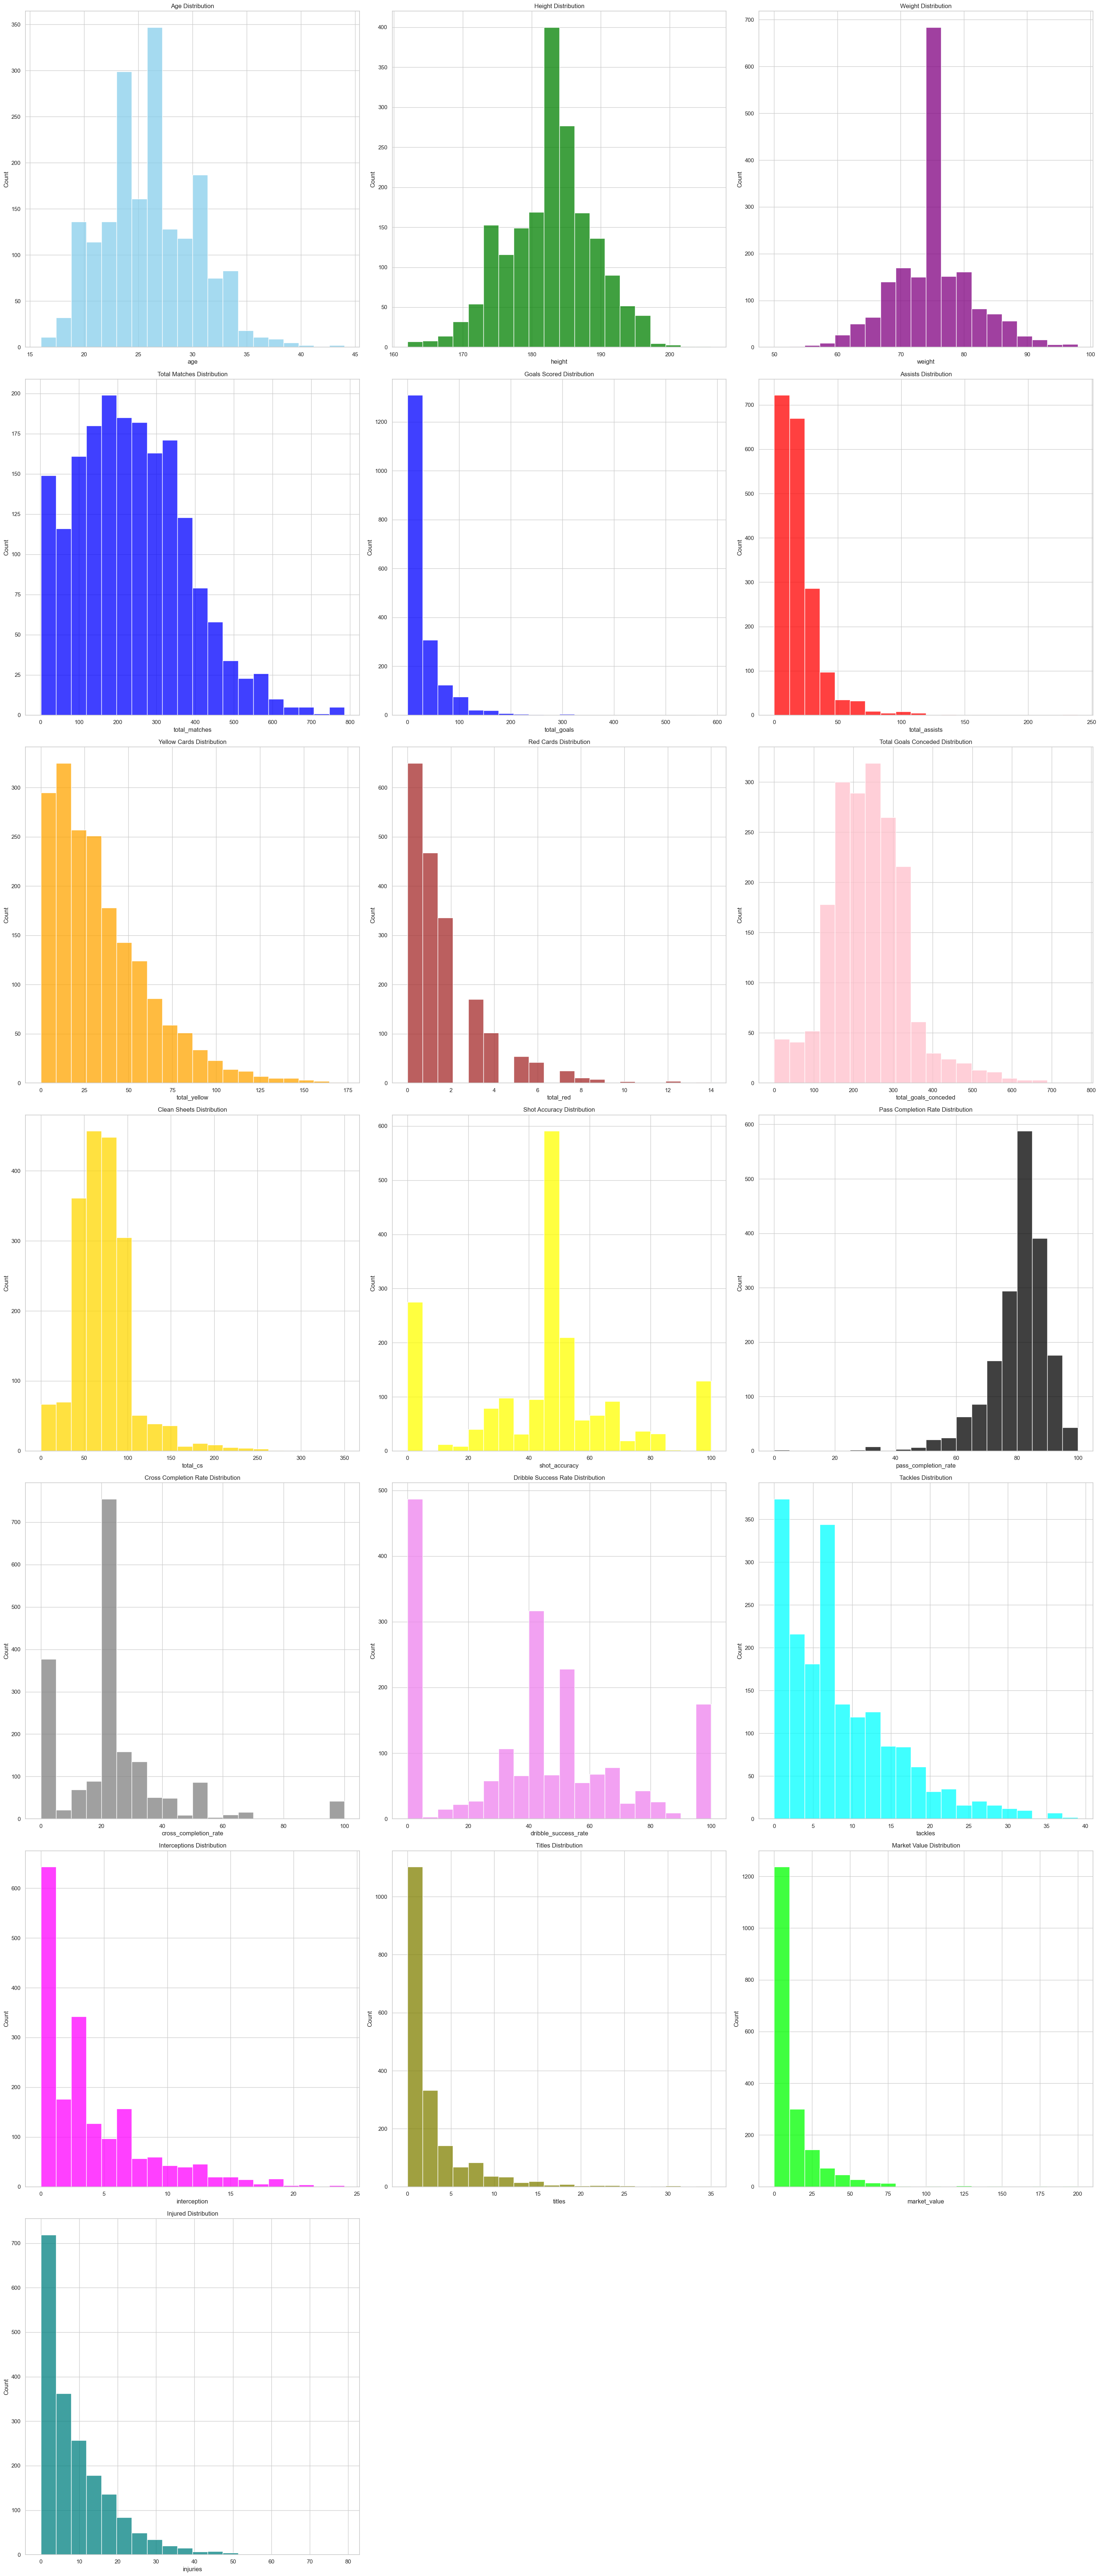

In [18]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(30, 70))

plot_configs = [
    ('age', 'skyblue', 'Age Distribution'),
    ('height', 'green', 'Height Distribution'),
    ('weight', 'purple', 'Weight Distribution'),
    ('total_matches', 'blue', 'Total Matches Distribution'),
    ('total_goals', 'blue', 'Goals Scored Distribution'),
    ('total_assists', 'red', 'Assists Distribution'),
    ('total_yellow', 'orange', 'Yellow Cards Distribution'),
    ('total_red', 'brown', 'Red Cards Distribution'),
    ('total_goals_conceded', 'pink', 'Total Goals Conceded Distribution'),
    ('total_cs', 'gold', 'Clean Sheets Distribution'),
    ('shot_accuracy', 'yellow', 'Shot Accuracy Distribution'),
    ('pass_completion_rate', 'black', 'Pass Completion Rate Distribution'),
    ('cross_completion_rate', 'grey', 'Cross Completion Rate Distribution'),
    ('dribble_success_rate', 'violet', 'Dribble Success Rate Distribution'),
    ('tackles', 'cyan', 'Tackles Distribution'),
    ('interception', 'magenta', 'Interceptions Distribution'),
    ('titles', 'olive', 'Titles Distribution'),
    ('market_value', 'lime', 'Market Value Distribution'),
    ('injuries', 'teal', 'Injured Distribution'),
]

for idx, (column, color, title) in enumerate(plot_configs, 1):
    plt.subplot(7, 3, idx )
    if column in df.columns:  # Check if column exists
            sns.histplot(data=df, x=column, bins=20, color=color)
            plt.title(title)
            plt.xlabel(column)
    else:
        plt.text(0.5, 0.5, f'Column {column} not found', ha='center', va='center')

plt.tight_layout()
plt.show()
    

### Categorical attribute

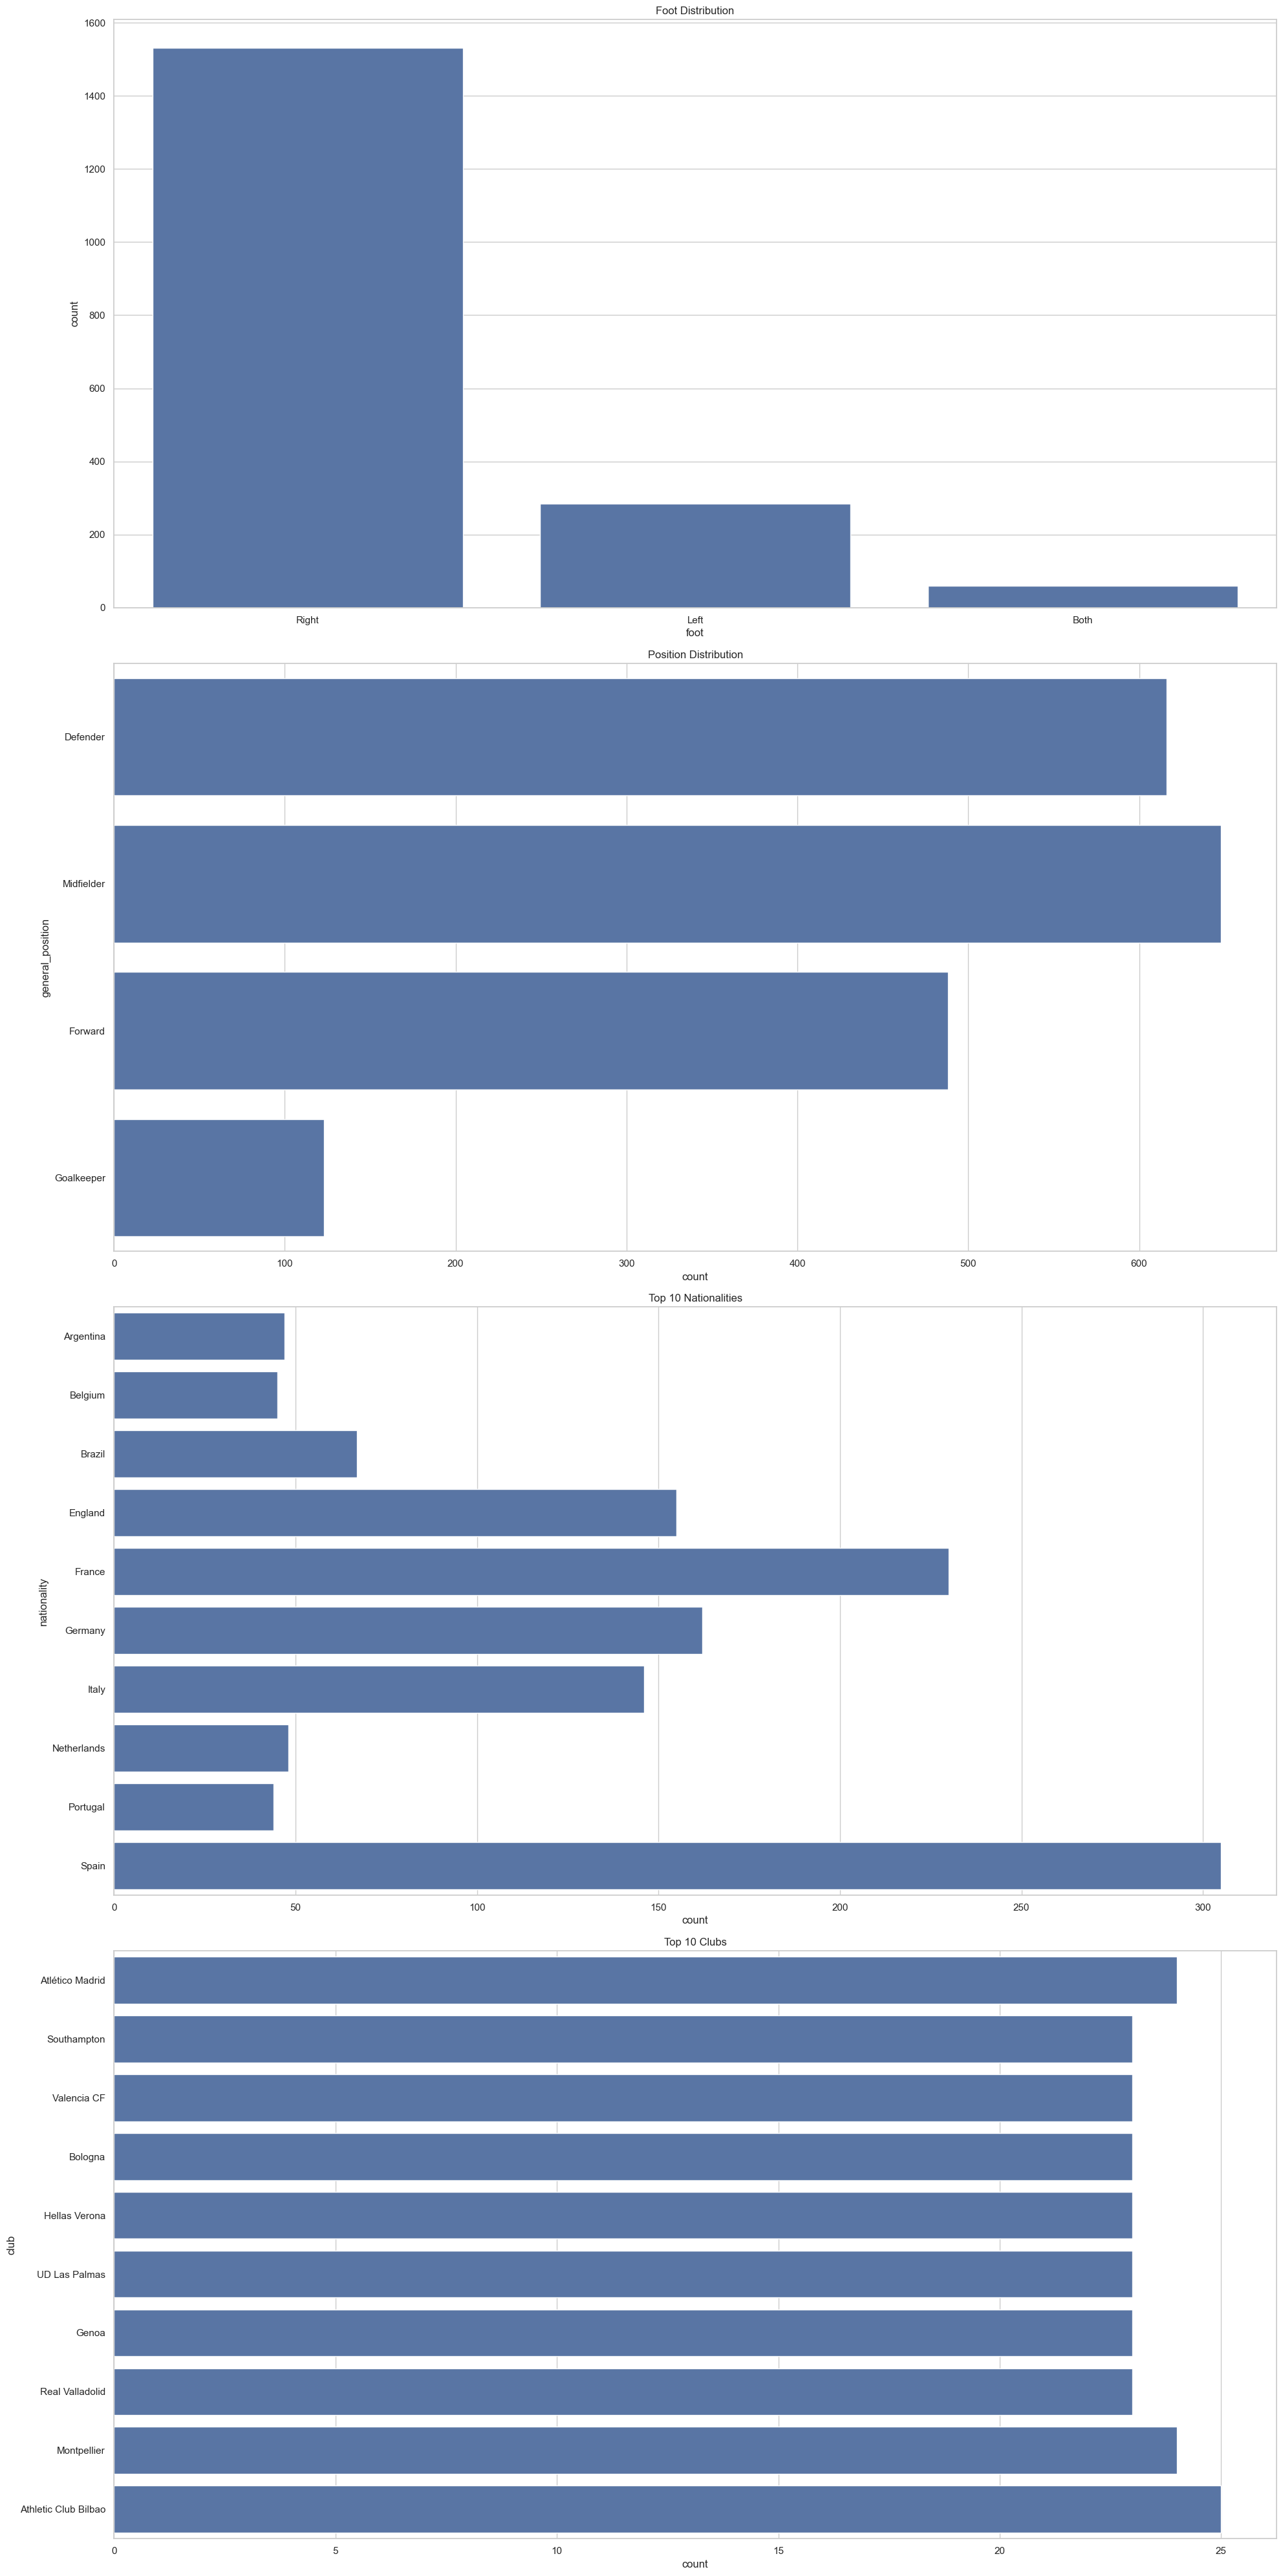

In [19]:
plt.figure(figsize=(20, 40))
# 1. Foot Distribution
plt.subplot(4, 1, 1)
sns.countplot(data=df, x='foot')
plt.title('Foot Distribution')

# 2. Position Distribution
plt.subplot(4, 1, 2)
sns.countplot(data=df, y='general_position')
plt.title('Position Distribution')

# 3. Top Nationalities (Top 10)
top_nationalities = df['nationality'].value_counts().nlargest(10).index
plt.subplot(4, 1, 3)
sns.countplot(data=df[df['nationality'].isin(top_nationalities)], y='nationality')
plt.title('Top 10 Nationalities')

# 4. Top Clubs (Top 10)
top_clubs = df['club'].value_counts().nlargest(10).index
plt.subplot(4, 1, 4)
sns.countplot(data=df[df['club'].isin(top_clubs)], y='club')
plt.title('Top 10 Clubs')

plt.tight_layout()
plt.show()

### Relationship distribution

Text(0.5, 1.0, 'Pass Completion Rate by Position')

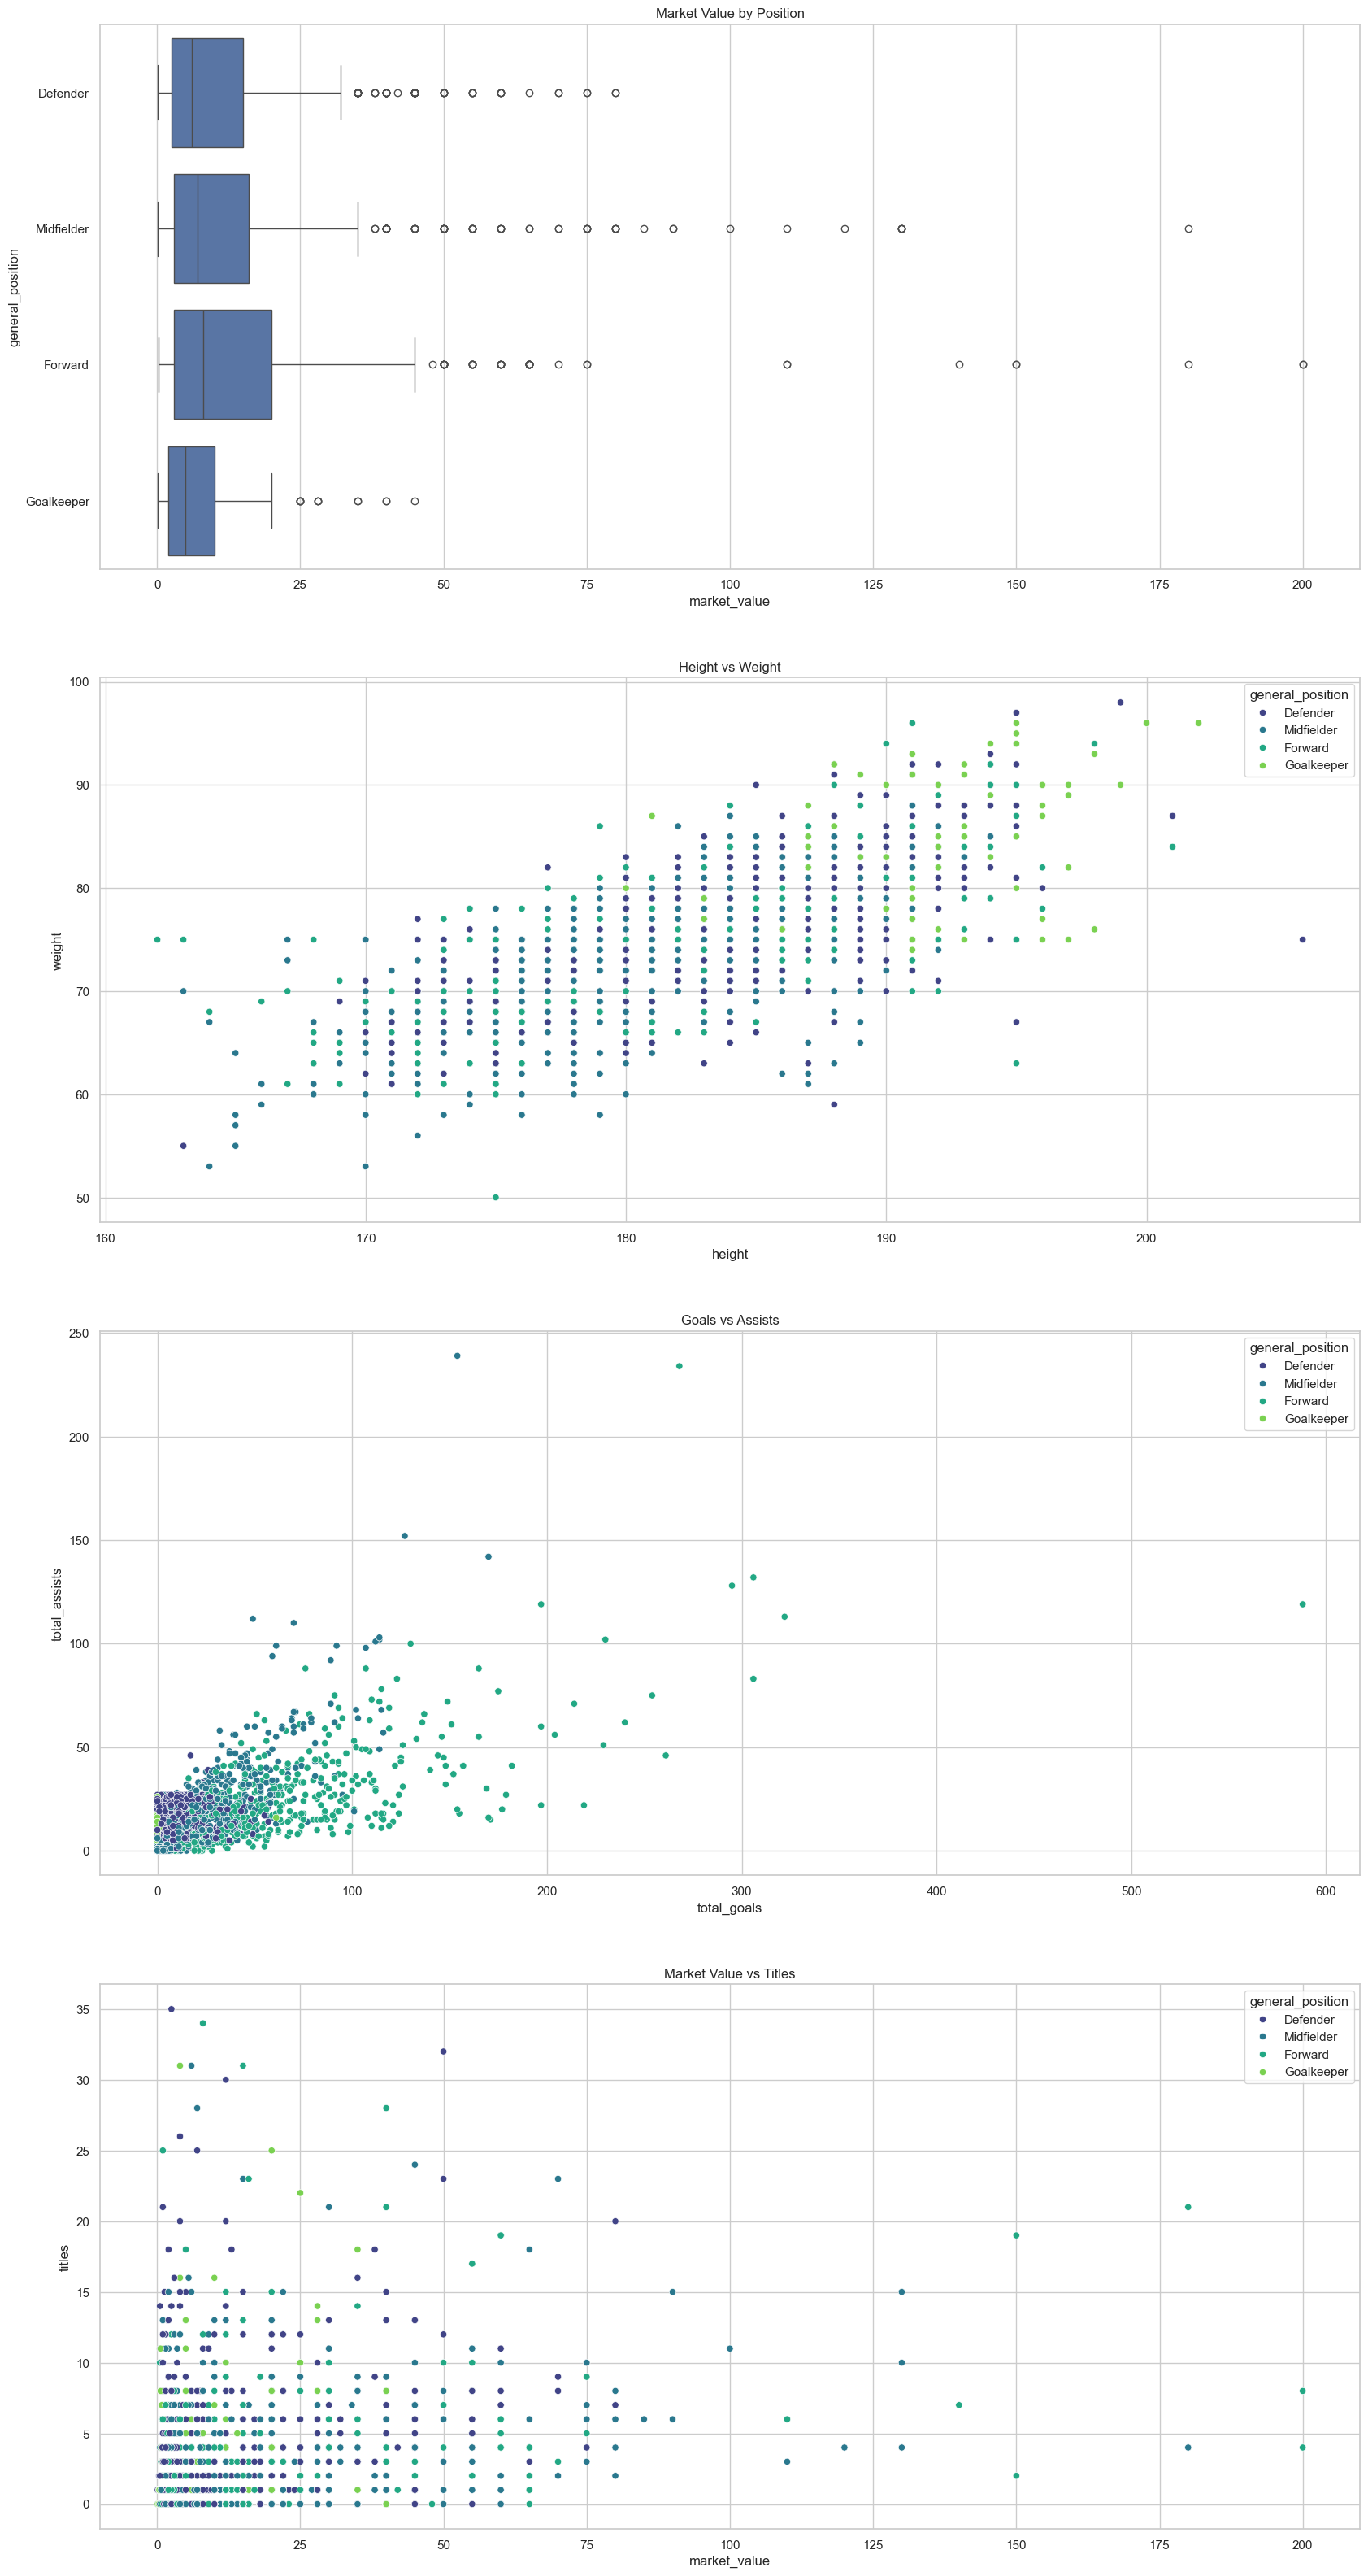

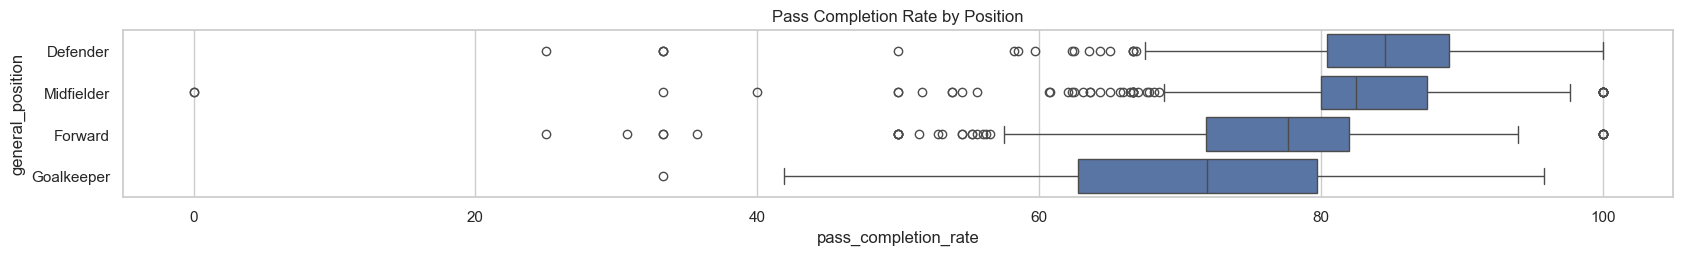

In [20]:
plt.figure(figsize=(20, 40))

# 1. Market value by position
plt.subplot(4, 1, 1)
sns.boxplot(data=df, x='market_value', y='general_position', showfliers=True)
plt.title('Market Value by Position')

# 2. Height vs Weight
plt.subplot(4, 1, 2)
sns.scatterplot(data=df, x='height', y='weight', hue='general_position', palette='viridis')
plt.title('Height vs Weight')

# 3. Goals vs Assists
plt.subplot(4, 1, 3)
sns.scatterplot(data=df, x='total_goals', y='total_assists', hue='general_position', palette='viridis')
plt.title('Goals vs Assists')

# 4. Market Value vs Titles
plt.subplot(4, 1, 4)
sns.scatterplot(data=df, x='market_value', y='titles', hue='general_position', palette='viridis')
plt.title('Market Value vs Titles')

# 5. Pass completion rate by general_position
plt.figure(figsize=(20, 10))
plt.subplot(4, 1, 1)
sns.boxplot(data=df, x='pass_completion_rate', y='general_position', showfliers=True)
plt.title('Pass Completion Rate by Position')

### Treating outlier

In [21]:
# df_numeric = df.select_dtypes(include=[np.number])
# df_transformed = pd.DataFrame()
# df_lambda = []
# standard_normalize = ['age','height','weight','total_matches']
# log_transform = ['title','injuries']
# scaler = StandardScaler()
# for column_name, column in df_numeric.items():
#     if column_name in standard_normalize:
#         df_transformed[column_name] = scaler.fit_transform(column.values.reshape(-1, 1)).flatten()
#     elif column_name in log_transform:
#         df_transformed[column_name] = np.log1p(column)
#     else:
#         col_transformed, col_lambda  = stats.yeojohnson(column)
#         df_transformed[column_name] = col_transformed
#         df_lambda.append(col_lambda)

In [22]:
# # Loop through each column in the transformed DataFrame
# df_copy = df
# for column_name, column in df_transformed.items():
#     df_copy[column_name] = column
#     plt.figure(figsize=(8, 4))
#     sns.histplot(column, kde=True)
#     plt.title(f'Histogram for {column_name}')
#     plt.xlabel(column_name)
#     plt.ylabel('Frequency')
#     plt.show()

#### Removing some columns

Due to extremely skewed data distribution, the below columns will have to be removed

In [23]:
# df = df.drop('position', axis=1) # this one is actually redundant
# df = df.drop('shot_accuracy', axis=1)
# df = df.drop('minutes_per_goal_conceded', axis=1)
# df = df.drop('cross_completion_rate', axis=1)

#### Removing outlier

In [24]:
# # function to remove outliers
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # remove all outliers from numeric columns
# for column in df.columns:
#     if df[column].dtype in ['Int64', 'Float64']:
#         df = remove_outliers_iqr(df, column)
        
# df.shape

In [25]:
df.to_csv('players_transformed.csv')